In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/CSE544 final project'

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1GgyJpPYC65xw7Z6QlWaXZZUIixBbVtRT/CSE544 final project


In [ ]:
import os
os.path.abspath(os.getcwd())


'/content'

In [2]:
import pandas as pd
import numpy as np

# Mandatory C

In [3]:
##Load data, last three months of 2020 (Oct, Nov, Dec)
#CA confirmed
df = pd.read_csv('./data_mandatory/CA_confirmed_cleaned.csv',index_col='Date')
train1 = np.array(list(df.loc['2020-10-01':'2020-12-31','CA confirmed']))
# test1 = np.array(list(df.loc['2020-08-22':'2020-08-28','CA confirmed']))

#CO confirmed
df = pd.read_csv('./data_mandatory/CO_confirmed_cleaned.csv',index_col='Date')
train2 = np.array(list(df.loc['2020-10-01':'2020-12-31','CO confirmed']))
# test2 = np.array(list(df.loc['2020-08-22':'2020-08-28','CO confirmed']))

#CA deaths
df = pd.read_csv('./data_mandatory/CA_deaths_cleaned.csv',index_col='Date')
train3 = np.array(list(df.loc['2020-10-01':'2020-12-31','CA deaths']))
# test3 = np.array(list(df.loc['2020-08-22':'2020-08-28','CA deaths']))

#CO deaths
df = pd.read_csv('./data_mandatory/CO_deaths_cleaned.csv',index_col='Date')
train4 = np.array(list(df.loc['2020-10-01':'2020-12-31','CO deaths']))
# test4 = np.array(list(df.loc['2020-08-22':'2020-08-28','CO deaths']))

In [ ]:
print(len(train1), len(train2), len(train3), len(train4))

62 50 87 71


## K-S test, 1-sample test

In [ ]:
##Utils function
#use MME to get mean and variance of the distribution
def MME(data):
  mean = data.mean()
  var = np.sum( (data-mean)**2 ) / len(data)
  return mean, var


mean, var of CA 6669.064516129032 19543804.092611864
train1_max, train1_min 19764 1391
train2_max, train2_min 3028 0
Poisson!
estimated mu = mean (MME from CA) =  6669.064516129032
H0: The distribution of confirmed cases in CO and poisson distribution derived from CA through MME is the same.
max diff D(F_x, F_y):  1.0
ks_max greater than threshold 0.05, reject H0


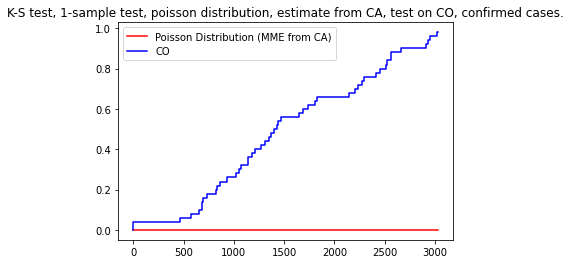

Geometric!
estimated p = 1 / mean (MME from CA) =  0.00014994606778529659
H0: The distribution of confirmed cases in CO and geometric distribution derived from CA through MME is the same.
max diff D(F_x, F_y):  0.6350378108823924
ks_max greater than threshold 0.05, reject H0


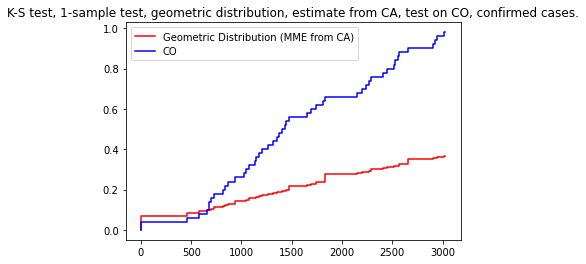

Binomial!
estimated p = mean / n (MME from CA) =  0.362981794814621
H0: The distribution of confirmed cases in CO and binomial distribution derived from CA through MME is the same.
max diff D(F_x, F_y):  0.6385931576623072
ks_max greater than threshold 0.05, reject H0


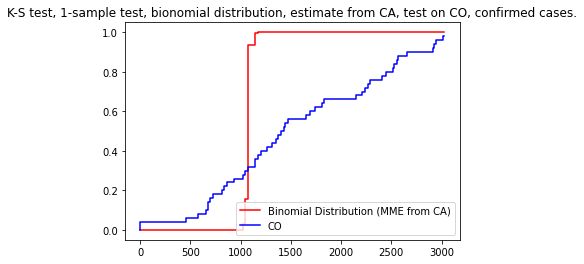

In [ ]:
##K-S test, 1-sample test
## daily #cases: train1, train2
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson
from scipy import stats
import matplotlib.pyplot as plt
# use MME on the Oct-Dec 2020 data of the first state in your dataset to obtain parameters of the distribution
mean, var = MME(train1) # state1: CA
print('mean, var of CA', mean, var)
train1_max, train1_min = np.max(train1), np.min(train1)
train2_max, train2_min = np.max(train2), np.min(train2)
print('train1_max, train1_min', train1_max, train1_min)
print('train2_max, train2_min', train2_max, train2_min)

# poisson
print('Poisson!')
# lambda = mean
mu = mean
print('estimated mu = mean (MME from CA) = ', mu)
n_1 = train1_max-train1_min+0.0
n_2 = train2_max-train2_min+0.0

print('H0: The distribution of confirmed cases in CO and poisson distribution derived from CA through MME is the same.')
np.random.seed(12345678)  #fix random seed to get the same result
n1 = len(train2)  # size of first sample
n2 = len(train2)  # size of second sample
# x1: generated poisson distribution; x2: empirical CO sample
x1 = np.sort(train2)
y1 = list()
for _item in x1:
  prob = poisson.cdf(int(_item), mu)
  y1.append(prob)
y1 = np.array(y1)
x2 = np.sort(train2)
y2 = np.arange(len(x2))/float(len(x2))

ftrain1 = np.array(y1)
ftrain2_neg = np.arange(len(x2))/float(len(x2))
ftrain2_pos = np.arange(1, len(x2)+1 )/float(len(x2) )
ftrain1_ftrain2_neg = np.abs(ftrain1 - ftrain2_neg)
ftrain1_ftrain2_pos = np.abs(ftrain1 - ftrain2_pos)

ks_max = max(ftrain1_ftrain2_pos[np.argmax(ftrain1_ftrain2_pos)], ftrain1_ftrain2_neg[np.argmax(ftrain1_ftrain2_neg)])
print('max diff D(F_x, F_y): ', ks_max)

if ks_max > 0.05:
	print('ks_max greater than threshold 0.05, reject H0')
else:
	print('ks_max less and equal than threshold 0.05, accept H0')
 

plt.step(x1, y1, c = 'r', label = 'Poisson Distribution (MME from CA)')
plt.step(x2, y2, c = 'b', label = 'CO')
plt.title('K-S test, 1-sample test, poisson distribution, estimate from CA, test on CO, confirmed cases.')
plt.legend()
plt.show()

# geometric
print('Geometric!')
# p = 1 / mean
p = 1 / (mean+0.0)
print('estimated p = 1 / mean (MME from CA) = ', p)
n_1 = train1_max-train1_min+0.0
n_2 = train2_max-train2_min+0.0

print('H0: The distribution of confirmed cases in CO and geometric distribution derived from CA through MME is the same.')
np.random.seed(12345678)  #fix random seed to get the same result
n1 = len(train2)  # size of first sample
n2 = len(train2)  # size of second sample
# x1: generated bionomial distribution; x2: empirical CO sample
x1 = np.sort(train2)
y1 = list()
for _item in x1:
  prob = geom.cdf(int(_item), p)
  y1.append(prob)
y1 = np.array(y1)
x2 = np.sort(train2)
y2 = np.arange(len(x2))/float(len(x2))

ftrain1 = np.array(y1)
ftrain2_neg = np.arange(len(x2))/float(len(x2))
ftrain2_pos = np.arange(1, len(x2)+1 )/float(len(x2) )
ftrain1_ftrain2_neg = np.abs(ftrain1 - ftrain2_neg)
ftrain1_ftrain2_pos = np.abs(ftrain1 - ftrain2_pos)

ks_max = max(ftrain1_ftrain2_pos[np.argmax(ftrain1_ftrain2_pos)], ftrain1_ftrain2_neg[np.argmax(ftrain1_ftrain2_neg)])
print('max diff D(F_x, F_y): ', ks_max)

if ks_max > 0.05:
	print('ks_max greater than threshold 0.05, reject H0')
else:
	print('ks_max less and equal than threshold 0.05, accept H0')
 

plt.step(x1, y1, c = 'r', label = 'Geometric Distribution (MME from CA)')
plt.step(x2, y2, c = 'b', label = 'CO')
plt.title('K-S test, 1-sample test, geometric distribution, estimate from CA, test on CO, confirmed cases.')
plt.legend()
plt.show()


# binomial: get parameter p
print('Binomial!')
# p = mean / n
p = mean / (train1_max-train1_min+0.0)
print('estimated p = mean / n (MME from CA) = ', p)
n_1 = train1_max-train1_min+0.0
n_2 = train2_max-train2_min+0.0

print('H0: The distribution of confirmed cases in CO and binomial distribution derived from CA through MME is the same.')
np.random.seed(12345678)  #fix random seed to get the same result
n1 = len(train2)  # size of first sample
n2 = len(train2)  # size of second sample
# x1: generated bionomial distribution; x2: empirical CO sample
x1 = np.sort(train2)
y1 = list()
for _item in x1:
  prob = binom.cdf(int(_item), int(n_2), p)
  y1.append(prob)
y1 = np.array(y1)
x2 = np.sort(train2)
y2 = np.arange(len(x2))/float(len(x2))

ftrain1 = np.array(y1)
ftrain2_neg = np.arange(len(x2))/float(len(x2))
ftrain2_pos = np.arange(1, len(x2)+1 )/float(len(x2) )
ftrain1_ftrain2_neg = np.abs(ftrain1 - ftrain2_neg)
ftrain1_ftrain2_pos = np.abs(ftrain1 - ftrain2_pos)

# print('Loc of Max diferences: ', np.argmax(ftrain1_ftrain2_pos))
# print(ftrain1_ftrain2_pos[np.argmax(ftrain1_ftrain2_pos)]) 
# print(np.argmax(ftrain1_ftrain2_neg)) 
# print(ftrain1_ftrain2_neg[np.argmax(ftrain1_ftrain2_neg)])
ks_max = max(ftrain1_ftrain2_pos[np.argmax(ftrain1_ftrain2_pos)], ftrain1_ftrain2_neg[np.argmax(ftrain1_ftrain2_neg)])
print('max diff D(F_x, F_y): ', ks_max)

if ks_max > 0.05:
	print('ks_max greater than threshold 0.05, reject H0')
else:
	print('ks_max less and equal than threshold 0.05, accept H0')
 

plt.step(x1, y1, c = 'r', label = 'Binomial Distribution (MME from CA)')
plt.step(x2, y2, c = 'b', label = 'CO')
plt.title('K-S test, 1-sample test, bionomial distribution, estimate from CA, test on CO, confirmed cases.')
plt.legend()
plt.show()

mean, var of CA 86.41379310344827 5369.02417756639
train3_max, train3_min 312 3
train4_max, train4_min 43 0
Poisson!
estimated mu = mean (MME from CA) =  86.41379310344827
H0: The distribution of death cases in CO and poisson distribution derived from CA through MME is the same.
max diff D(F_x, F_y):  0.9999998210180034
ks_max greater than threshold, reject H0


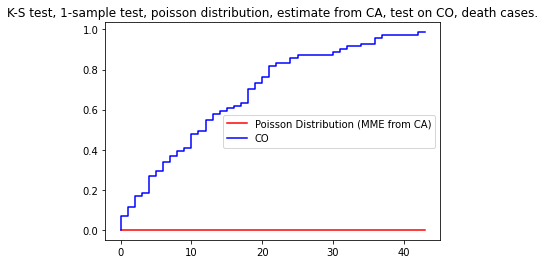

Geometric!
estimated p = 1 / mean (MME from CA) =  0.01157222665602554
H0: The distribution of death cases in CO and geometric distribution derived from CA through MME is the same.
max diff D(F_x, F_y):  0.6219049570862651
ks_max greater than threshold, reject H0


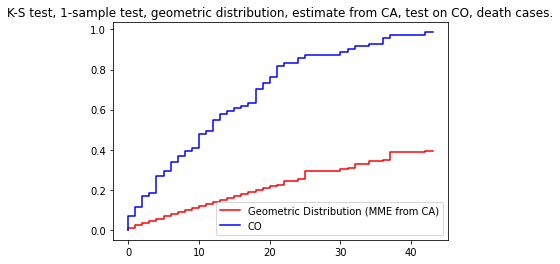

Binomial!
estimated p = mean / n (MME from CA) =   0.279656288360674
H0: The distribution of death cases in CO and bionomial distribution derived from CA through MME is the same.
max diff D(F_x, F_y):  0.34957451889394886
ks_max greater than threshold, reject H0


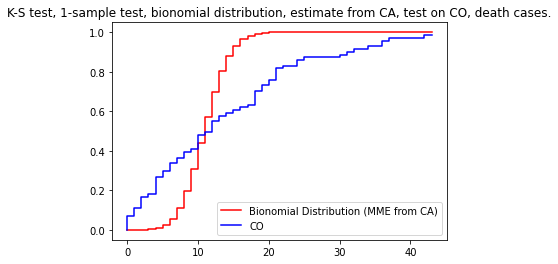

In [ ]:
##K-S test, 1-sample test
## daily #death: train3, train4
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import poisson
from scipy import stats
import matplotlib.pyplot as plt
# use MME on the Oct-Dec 2020 data of the first state in your dataset to obtain parameters of the distribution
mean, var = MME(train3) # state1: CA
print('mean, var of CA', mean, var)
train3_max, train3_min = np.max(train3), np.min(train3)
train4_max, train4_min = np.max(train4), np.min(train4)
print('train3_max, train3_min', train3_max, train3_min)
print('train4_max, train4_min', train4_max, train4_min)

# poisson
print('Poisson!')
# lambda = mean
mu = mean
print('estimated mu = mean (MME from CA) = ', mu)
n_1 = train3_max-train3_min+0.0
n_2 = train4_max-train4_min+0.0

print('H0: The distribution of death cases in CO and poisson distribution derived from CA through MME is the same.')
np.random.seed(12345678)  #fix random seed to get the same result
n1 = len(train4)  # size of first sample
n2 = len(train4)  # size of second sample
# x1: generated poisson distribution; x2: empirical CO sample
x1 = np.sort(train4)
y1 = list()
for _item in x1:
  prob = poisson.cdf(int(_item-train4_min), mu)
  y1.append(prob)
y1 = np.array(y1)
x2 = np.sort(train4)
y2 = np.arange(len(x2))/float(len(x2))

ftrain3 = np.array(y1)
ftrain4_neg = np.arange(len(x2))/float(len(x2))
ftrain4_pos = np.arange(1, len(x2)+1 )/float(len(x2) )
ftrain3_ftrain4_neg = np.abs(ftrain3 - ftrain4_neg)
ftrain3_ftrain4_pos = np.abs(ftrain3 - ftrain4_pos)

ks_max = max(ftrain3_ftrain4_pos[np.argmax(ftrain3_ftrain4_pos)], ftrain3_ftrain4_neg[np.argmax(ftrain3_ftrain4_neg)])
print('max diff D(F_x, F_y): ', ks_max)

if ks_max > 0.05:
	print('ks_max greater than threshold, reject H0')
else:
	print('ks_max less and equal than threshold, accept H0')
 

plt.step(x1, y1, c = 'r', label = 'Poisson Distribution (MME from CA)')
plt.step(x2, y2, c = 'b', label = 'CO')
plt.title('K-S test, 1-sample test, poisson distribution, estimate from CA, test on CO, death cases.')
plt.legend()
plt.show()

# geometric
print('Geometric!')
# p = 1 / mean
p = 1 / (mean+0.0)
print('estimated p = 1 / mean (MME from CA) = ', p)
n_1 = train3_max-train3_min+0.0
n_2 = train4_max-train4_min+0.0

print('H0: The distribution of death cases in CO and geometric distribution derived from CA through MME is the same.')
np.random.seed(12345678)  #fix random seed to get the same result
n1 = len(train4)  # size of first sample
n2 = len(train4)  # size of second sample
# x1: generated bionomial distribution; x2: empirical CO sample
x1 = np.sort(train4)
y1 = list()
for _item in x1:
  prob = geom.cdf(int(_item-train4_min), p)
  y1.append(prob)
y1 = np.array(y1)
x2 = np.sort(train4)
y2 = np.arange(len(x2))/float(len(x2))

ftrain3 = np.array(y1)
ftrain4_neg = np.arange(len(x2))/float(len(x2))
ftrain4_pos = np.arange(1, len(x2)+1 )/float(len(x2) )
ftrain3_ftrain4_neg = np.abs(ftrain3 - ftrain4_neg)
ftrain3_ftrain4_pos = np.abs(ftrain3 - ftrain4_pos)

ks_max = max(ftrain3_ftrain4_pos[np.argmax(ftrain3_ftrain4_pos)], ftrain3_ftrain4_neg[np.argmax(ftrain3_ftrain4_neg)])
print('max diff D(F_x, F_y): ', ks_max)

if ks_max > 0.05:
	print('ks_max greater than threshold, reject H0')
else:
	print('ks_max less and equal than threshold, accept H0')
 

plt.step(x1, y1, c = 'r', label = 'Geometric Distribution (MME from CA)')
plt.step(x2, y2, c = 'b', label = 'CO')
plt.title('K-S test, 1-sample test, geometric distribution, estimate from CA, test on CO, death cases.')
plt.legend()
plt.show()


# binomial: get parameter p
print('Binomial!')
# p = mean / n
p = mean / (train3_max-train3_min+0.0)
print('estimated p = mean / n (MME from CA) =  ', p)
n_1 = train3_max-train3_min+0.0
n_2 = train4_max-train4_min+0.0

print('H0: The distribution of death cases in CO and bionomial distribution derived from CA through MME is the same.')
np.random.seed(12345678)  #fix random seed to get the same result
n1 = len(train4)  # size of first sample
n2 = len(train4)  # size of second sample
# x1: generated bionomial distribution; x2: empirical CO sample
x1 = np.sort(train4)
y1 = list()
for _item in x1:
  prob = binom.cdf(int(_item-train4_min), int(n_2), p)
  y1.append(prob)
y1 = np.array(y1)
x2 = np.sort(train4)
y2 = np.arange(len(x2))/float(len(x2))

ftrain3 = np.array(y1)
ftrain4_neg = np.arange(len(x2))/float(len(x2))
ftrain4_pos = np.arange(1, len(x2)+1 )/float(len(x2) )
ftrain3_ftrain4_neg = np.abs(ftrain3 - ftrain4_neg)
ftrain3_ftrain4_pos = np.abs(ftrain3 - ftrain4_pos)

# print('Loc of Max diferences: ', np.argmax(ftrain3_ftrain4_pos))
# print(ftrain3_ftrain4_pos[np.argmax(ftrain3_ftrain4_pos)]) 
# print(np.argmax(ftrain3_ftrain4_neg)) 
# print(ftrain3_ftrain4_neg[np.argmax(ftrain3_ftrain4_neg)])
ks_max = max(ftrain3_ftrain4_pos[np.argmax(ftrain3_ftrain4_pos)], ftrain3_ftrain4_neg[np.argmax(ftrain3_ftrain4_neg)])
print('max diff D(F_x, F_y): ', ks_max)

if ks_max > 0.05:
	print('ks_max greater than threshold, reject H0')
else:
	print('ks_max less and equal than threshold, accept H0')
 

plt.step(x1, y1, c = 'r', label = 'Bionomial Distribution (MME from CA)')
plt.step(x2, y2, c = 'b', label = 'CO')
plt.title('K-S test, 1-sample test, bionomial distribution, estimate from CA, test on CO, death cases.')
plt.legend()
plt.show()

## K-S test, 2-sample test

max diff D(F_x, F_y):  0.8548387096774194
ks_max greater than threshold 0.05, reject H0


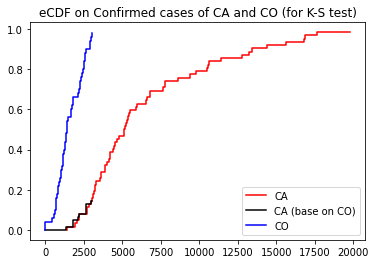

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01612903 0.01612903 0.01612903 0.01612903 0.01612903 0.01612903
 0.01612903 0.01612903 0.01612903 0.0483871  0.06451613 0.08064516
 0.08064516 0.08064516 0.08064516 0.08064516 0.08064516 0.08064516
 0.08064516 0.08064516 0.08064516 0.12903226 0.12903226 0.12903226
 0.14516129 0.14516129]


In [4]:
## K-S test, 2-sample test
## daily #cases: train1, train2
from scipy import stats
import matplotlib.pyplot as plt

# H0: The distribution of confirmed cases in CA and CO is the same.
np.random.seed(12345678)  #fix random seed to get the same result
n1 = len(train1)  # size of first sample
n2 = len(train2)  # size of second sample

x1 = np.sort(train1)
y1 = np.arange(len(x1))/float(len(x1))
x2 = np.sort(train2)
y2 = np.arange(len(x2))/float(len(x2))

ftrain1 = list()
for _i in range(len(x2)):
	ftrain1.append( np.sum(x1 <= x2[_i]) / len(x1) )
ftrain1 = np.array(ftrain1)
ftrain2_neg = np.arange(len(x2))/float(len(x2))
ftrain2_pos = np.arange(1, len(x2)+1 )/float(len(x2) )
ftrain1_ftrain2_neg = np.abs(ftrain1 - ftrain2_neg)
ftrain1_ftrain2_pos = np.abs(ftrain1 - ftrain2_pos)

# print('Loc of Max diferences: ', np.argmax(ftrain1_ftrain2_pos)) # 91
# print(ftrain1_ftrain2_pos[np.argmax(ftrain1_ftrain2_pos)]) 
# print(np.argmax(ftrain1_ftrain2_neg)) # 91
# print(ftrain1_ftrain2_neg[np.argmax(ftrain1_ftrain2_neg)])
ks_max = max(ftrain1_ftrain2_pos[np.argmax(ftrain1_ftrain2_pos)], ftrain1_ftrain2_neg[np.argmax(ftrain1_ftrain2_neg)])
print('max diff D(F_x, F_y): ', ks_max)

if ks_max > 0.05:
	print('ks_max greater than threshold 0.05, reject H0')
else:
	print('ks_max less and equal than threshold 0.05, accept H0')
 

plt.step(x1, y1, c = 'r', label = 'CA')
plt.step(x2, ftrain1, c = 'black', label = 'CA (base on CO)')
plt.step(x2, y2, c = 'b', label = 'CO')
plt.title('eCDF on Confirmed cases of CA and CO (for K-S test)')
plt.legend()
plt.show()
print(ftrain1)

Loc of Max diferences:  61
0.7353084021369596
61
0.7212238950947061
max diff D(F_x, F_y):  0.7353084021369596
ks_max greater than threshold 0.05, reject H0


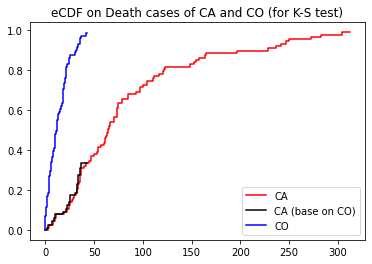

In [6]:
## K-S test, 2-sample test
## daily #death: train3, train4
from scipy import stats
import matplotlib.pyplot as plt

# H0: The distribution of death cases in CA and CO is the same.
np.random.seed(12345678)  #fix random seed to get the same result
n1 = len(train3)  # size of first sample
n2 = len(train4)  # size of second sample

x1 = np.sort(train3)
y1 = np.arange(len(x1))/float(len(x1))
x2 = np.sort(train4)
y2 = np.arange(len(x2))/float(len(x2))

ftrain3 = list()
for _i in range(len(x2)):
	ftrain3.append( np.sum(x1 <= x2[_i]) / len(x1) )
ftrain3 = np.array(ftrain3)
ftrain4_neg = np.arange(len(x2))/float(len(x2))
ftrain4_pos = np.arange(1, len(x2)+1 )/float(len(x2) )
ftrain3_ftrain4_neg = np.abs(ftrain3 - ftrain4_neg)
ftrain3_ftrain4_pos = np.abs(ftrain3 - ftrain4_pos)

print('Loc of Max diferences: ', np.argmax(ftrain3_ftrain4_pos)) # 91
print(ftrain3_ftrain4_pos[np.argmax(ftrain3_ftrain4_pos)]) 
print(np.argmax(ftrain3_ftrain4_neg)) # 91
print(ftrain3_ftrain4_neg[np.argmax(ftrain3_ftrain4_neg)])
ks_max = max(ftrain3_ftrain4_pos[np.argmax(ftrain3_ftrain4_pos)], ftrain3_ftrain4_neg[np.argmax(ftrain3_ftrain4_neg)])
print('max diff D(F_x, F_y): ', ks_max)

if ks_max > 0.05:
	print('ks_max greater than threshold 0.05, reject H0')
else:
	print('ks_max less and equal than threshold 0.05, accept H0')
 

plt.step(x1, y1, c = 'r', label = 'CA')
plt.step(x2, ftrain3, c = 'black', label = 'CA (base on CO)')
plt.step(x2, y2, c = 'b', label = 'CO')
plt.title('eCDF on Death cases of CA and CO (for K-S test)')
plt.legend()
plt.show()

## Permutation test

In [ ]:
## daily #cases: train1, train2
# compute t_observed
t_obs = np.abs(train1.mean() - train2.mean())
# combine two state's confirmed cases
_confirmed = np.concatenate((train1, train2))
perm_test = np.copy(_confirmed)
print('train1, train2, all mean', train1.mean(), train2.mean(), perm_test.mean())
print('t_obs', t_obs)
# H0: The distribution of confirmed cases in CA and CO is the same.
count_extreme = 0
n_permutations = 1000

for _ in range(n_permutations):
	# permutate the dataset
	np.random.shuffle(perm_test)
	d1_p = perm_test[:len(train1)]
	d2_p = perm_test[len(train1):]
	assert len(train1) == len(d1_p)
	assert len(train2) == len(d2_p)
	# print('d1_p.mean(),  d2_p.mean()', d1_p.mean(), d2_p.mean())
	t_i = np.abs(d1_p.mean() - d2_p.mean())

	if t_i > t_obs:
		count_extreme += 1
print('T_i (count_extreme)', count_extreme)
p_value = count_extreme / n_permutations
print('p_value', p_value) # p-value = 0
if p_value <= 0.05:
	print('p_value less and equal than threshold 0.05, reject H0')
else:
	print('p_value greater than threshold 0.05, accept H0')

train1, train2, all mean 6669.064516129032 1583.26 4398.616071428572
t_obs 5085.804516129032
T_i (count_extreme) 0
p_value 0.0
p_value less and equal than threshold 0.05, reject H0


In [ ]:
## daily #deaths: train3, train4
# compute t_observed
t_obs = np.abs(train3.mean() - train4.mean())
# combine two state's confirmed cases
_confirmed = np.concatenate((train3, train4))
perm_test = np.copy(_confirmed)
print('train3, train4, all mean', train3.mean(), train4.mean(), perm_test.mean())
print('t_obs', t_obs)
# H0: The distribution of death cases in CA and CO is the same.
count_extreme = 0
n_permutations = 1000

for _ in range(n_permutations):
	# permutate the dataset
	np.random.shuffle(perm_test)
	d1_p = perm_test[:len(train3)]
	d2_p = perm_test[len(train3):]
	assert len(train3) == len(d1_p)
	assert len(train4) == len(d2_p)
	# print('d1_p.mean(),  d2_p.mean()', d1_p.mean(), d2_p.mean())
	t_i = np.abs(d1_p.mean() - d2_p.mean())

	if t_i > t_obs:
		count_extreme += 1
print('T_i (count_extreme)', count_extreme)
p_value = count_extreme / n_permutations
print('p_value', p_value) # p-value = 0
if p_value <= 0.05:
	print('p_value less and equal than threshold 0.05, reject H0')
else:
	print('p_value greater than threshold 0.05, accept H0')

train3, train4, all mean 86.41379310344827 13.661971830985916 53.721518987341774
t_obs 72.75182127246235
T_i (count_extreme) 0
p_value 0.0
p_value less and equal than threshold 0.05, reject H0


# Mandatory D

In [ ]:
##Load data, last three months of 2020 (Oct, Nov, Dec)
#CA confirmed
df = pd.read_csv('./data_mandatory/CA_confirmed_cleaned.csv',index_col='Date')
train1 = np.array(list(df.loc['2020-06-01':'2020-06-28','CA confirmed']))
test15 = np.array(list(df.loc['2020-06-29':'2020-07-05','CA confirmed']))
test16 = np.array(list(df.loc['2020-07-06':'2020-07-12','CA confirmed']))
test17 = np.array(list(df.loc['2020-07-13':'2020-07-19','CA confirmed']))
test18 = np.array(list(df.loc['2020-07-20':'2020-07-26','CA confirmed']))


#CO confirmed
df = pd.read_csv('./data_mandatory/CO_confirmed_cleaned.csv',index_col='Date')
train2 = np.array(list(df.loc['2020-06-01':'2020-06-28','CO confirmed']))
test25 = np.array(list(df.loc['2020-06-29':'2020-07-05','CO confirmed']))
test26 = np.array(list(df.loc['2020-07-06':'2020-07-12','CO confirmed']))
test27 = np.array(list(df.loc['2020-07-13':'2020-07-19','CO confirmed']))
test28 = np.array(list(df.loc['2020-07-20':'2020-07-26','CO confirmed']))


#CA deaths
df = pd.read_csv('./data_mandatory/CA_deaths_cleaned.csv',index_col='Date')
train3 = np.array(list(df.loc['2020-06-01':'2020-06-28','CA deaths']))
test35 = np.array(list(df.loc['2020-06-29':'2020-07-05','CA deaths']))
test36 = np.array(list(df.loc['2020-07-06':'2020-07-12','CA deaths']))
test37 = np.array(list(df.loc['2020-07-13':'2020-07-19','CA deaths']))
test38 = np.array(list(df.loc['2020-07-20':'2020-07-26','CA deaths']))


#CO deaths
df = pd.read_csv('./data_mandatory/CO_deaths_cleaned.csv',index_col='Date')
train4 = np.array(list(df.loc['2020-06-01':'2020-06-28','CO deaths']))
test45 = np.array(list(df.loc['2020-06-29':'2020-07-05','CO deaths']))
test46 = np.array(list(df.loc['2020-07-06':'2020-07-12','CO deaths']))
test47 = np.array(list(df.loc['2020-07-13':'2020-07-19','CO deaths']))
test48 = np.array(list(df.loc['2020-07-20':'2020-07-26','CO deaths']))

# sum up the daily stats from both states
train_c = train1 + train2 # confirmed
train_d = train3 + train4 # deaths
test_c5 = test15 + test25
test_c6 = test16 + test26
test_c7 = test17 + test27
test_c8 = test18 + test28
test_d5 = test35 + test45
test_d6 = test36 + test46
test_d7 = test37 + test47
test_d8 = test38 + test48

print('mean test_d5', np.mean(test_d5))
print('mean test_d6', np.mean(test_d6))
print('mean test_d7', np.mean(test_d7))
print('mean test_d8', np.mean(test_d8))
print('len test_d5', len(test_d5))
print('len test_d6', len(test_d6))
print('len test_d7', len(test_d7))
print('len test_d8', len(test_d8))
print('test_d5', test_d5)
print('test_d6', test_d6)
print('test_d7', test_d7)
print('test_d8', test_d8)

mean test_d5 61.857142857142854
mean test_d6 106.0
mean test_d7 98.71428571428571
mean test_d8 111.28571428571429
len test_d5 7
len test_d6 7
len test_d7 7
len test_d8 7
test_d5 [ 54 113  86 104  52  18   6]
test_d6 [112 115 155 141 121  75  23]
test_d7 [ 49 152 135 124  60 160  11]
test_d8 [ 65 125 164 169 141  93  22]


Combine daily death from CA and CO states.
mean, var of CA 71.03571428571429 1076.9630102040817
First Prior is the estimated mu of Poisson, which is mean of first four weeks:  71.03571428571429
mu of poisson in posterior distribution (after week5) is:  61.857142857142854
mu of poisson in posterior distribution (after week6) is:  83.92857142857143
mu of poisson in posterior distribution (after week7) is:  88.85714285714286
mu of poisson in posterior distribution (after week8) is:  94.46428571428571


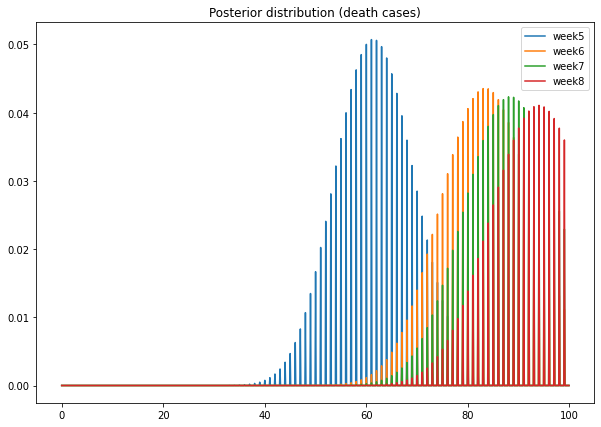

[1.36704934e-27 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.45617666e-26 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.61537464e-24 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.39265342e-23 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.33935332e-22 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.03169714e-20 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.06363062e-19 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [ ]:
# daily death
from scipy.stats import poisson
from scipy import stats
import matplotlib.pyplot as plt

##Utils function
#use MME to get mean and variance of the distribution
def MME(data):
  mean = data.mean()
  var = np.sum( (data-mean)**2 ) / len(data)
  return mean, var


# Assume the combined daily deaths are Poisson distributed with parameter λ.
print('Combine daily death from CA and CO states.')
mean, var = MME(train_d) # state1: CA
print('mean, var of CA', mean, var)
train_d = np.sort(train_d)
test_d5 = np.sort(test_d5)
test_d6 = np.sort(test_d6)
test_d7 = np.sort(test_d7)
test_d8 = np.sort(test_d8)

mu = mean
print('First Prior is the estimated mu of Poisson, which is mean of first four weeks: ', mu)

##According to question1
def norm(x, loc, var):
    return np.exp(-(x-loc)**2 /(2*var)) / np.sqrt(2*np.pi*var)

def posterior(data,mu,prior):
    #post_dis_x is the input of posterior distribution
    #data is sample data
    #mu: estimated parameter of prior
    f_mu_ginven_data = poisson.pmf(data, mu)
    post = 1
    for likelihood in f_mu_ginven_data:
      post = post * likelihood
    post = post * prior

    mu_post = np.mean(data)

    return mu_post, post


post_dis_x = np.arange(0,100,0.1)
_test_d6 = np.concatenate((test_d5, test_d6))
_test_d7 = np.concatenate((_test_d6, test_d7))
_test_d8 = np.concatenate((_test_d7, test_d8))

prior = mu
p5_list = list()
for _mu in post_dis_x:
  mu_5, p = posterior(test_d5,_mu,prior)
  p5_list.append(p)
print('mu of poisson in posterior distribution (after week5) is: ', mu_5)

prior = mu
p6_list = list()
for _mu in post_dis_x:
  mu_6, p = posterior(_test_d6,_mu,prior)
  p6_list.append(p)
print('mu of poisson in posterior distribution (after week6) is: ', mu_6)


p7_list = list()
for _mu in post_dis_x:
  mu_7, p = posterior(_test_d7,_mu,prior)
  p7_list.append(p)
print('mu of poisson in posterior distribution (after week7) is: ', mu_7)


p8_list = list()
for _mu in post_dis_x:
  mu_8, p = posterior(_test_d8,_mu,prior)
  p8_list.append(p)
print('mu of poisson in posterior distribution (after week8) is: ', mu_8)

p5_list = poisson.pmf(post_dis_x, mu_5)
p6_list = poisson.pmf(post_dis_x, mu_6)
p7_list = poisson.pmf(post_dis_x, mu_7)
p8_list = poisson.pmf(post_dis_x, mu_8)

plt.figure(figsize=(10,7))
plt.plot(post_dis_x,p5_list, label='week5')
plt.plot(post_dis_x,p6_list, label='week6')
plt.plot(post_dis_x,p7_list, label='week7')
plt.plot(post_dis_x,p8_list, label='week8')
plt.title('Posterior distribution (death cases)')
# plt.yticks([])
plt.legend()
plt.show()
print(p5_list)

## get the MAP
print('MAP for week 5: ', mu_5 ) 
print('MAP for week 6: ', mu_6 ) 
print('MAP for week 7: ', mu_7 ) 
print('MAP for week 8: ', mu_8 ) 


Combine daily confirmed from CA and CO states.
mean, var of CA 3826.6428571428573 1308324.5153061224
First Prior is the estimated mu of Poisson, which is mean of first four weeks:  3826.6428571428573
mu of poisson in posterior distribution (after week5) is:  6257.285714285715
mu of poisson in posterior distribution (after week6) is:  8223.57142857143
mu of poisson in posterior distribution (after week7) is:  8518.714285714286
mu of poisson in posterior distribution (after week8) is:  8891.82142857143


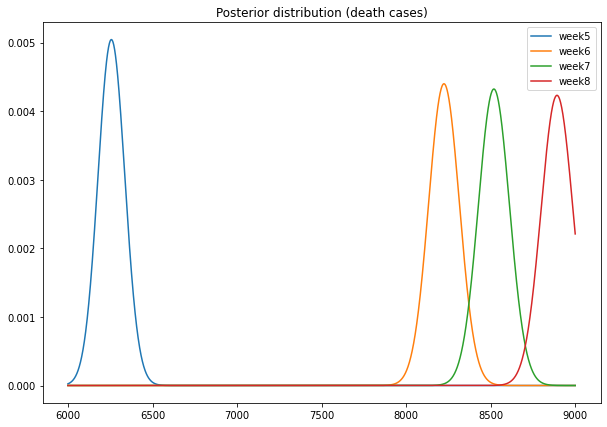

[2.41254140e-005 2.51557421e-005 2.62257024e-005 ... 3.42118322e-232
 2.37911991e-232 1.65427636e-232]
MAP for week 5:  6257.285714285715
MAP for week 6:  8223.57142857143
MAP for week 7:  8518.714285714286
MAP for week 8:  8891.82142857143


In [ ]:
# daily confirmed
from scipy.stats import poisson
from scipy import stats
import matplotlib.pyplot as plt

##Utils function
#use MME to get mean and variance of the distribution
def MME(data):
  mean = data.mean()
  var = np.sum( (data-mean)**2 ) / len(data)
  return mean, var


# Assume the combined daily confirmed are Poisson distributed with parameter λ.
print('Combine daily confirmed from CA and CO states.')
mean, var = MME(train_c) # state1: CA
print('mean, var of CA', mean, var)
train_c = np.sort(train_c)
test_c5 = np.sort(test_c5)
test_c6 = np.sort(test_c6)
test_c7 = np.sort(test_c7)
test_c8 = np.sort(test_c8)

mu = mean
print('First Prior is the estimated mu of Poisson, which is mean of first four weeks: ', mu)

##According to question1
def norm(x, loc, var):
    return np.exp(-(x-loc)**2 /(2*var)) / np.sqrt(2*np.pi*var)

def posterior(data,mu,prior):
    #post_dis_x is the input of posterior distribution
    #data is sample data
    #mu: estimated parameter of prior
    f_mu_ginven_data = poisson.pmf(data, mu)
    post = 1
    for likelihood in f_mu_ginven_data:
      post = post * likelihood
    post = post * prior

    mu_post = np.mean(data)

    return mu_post, post


post_dis_x = np.arange(6000,9000,1)
_test_c6 = np.concatenate((test_c5, test_c6))
_test_c7 = np.concatenate((_test_c6, test_c7))
_test_c8 = np.concatenate((_test_c7, test_c8))

prior = mu
p5_list = list()
for _mu in post_dis_x:
  mu_5, p = posterior(test_c5,_mu,prior)
  p5_list.append(p)
print('mu of poisson in posterior distribution (after week5) is: ', mu_5)

prior = mu
p6_list = list()
for _mu in post_dis_x:
  mu_6, p = posterior(_test_c6,_mu,prior)
  p6_list.append(p)
print('mu of poisson in posterior distribution (after week6) is: ', mu_6)


p7_list = list()
for _mu in post_dis_x:
  mu_7, p = posterior(_test_c7,_mu,prior)
  p7_list.append(p)
print('mu of poisson in posterior distribution (after week7) is: ', mu_7)


p8_list = list()
for _mu in post_dis_x:
  mu_8, p = posterior(_test_c8,_mu,prior)
  p8_list.append(p)
print('mu of poisson in posterior distribution (after week8) is: ', mu_8)

p5_list = poisson.pmf(post_dis_x, mu_5)
p6_list = poisson.pmf(post_dis_x, mu_6)
p7_list = poisson.pmf(post_dis_x, mu_7)
p8_list = poisson.pmf(post_dis_x, mu_8)

plt.figure(figsize=(10,7))
plt.plot(post_dis_x,p5_list, label='week5')
plt.plot(post_dis_x,p6_list, label='week6')
plt.plot(post_dis_x,p7_list, label='week7')
plt.plot(post_dis_x,p8_list, label='week8')
plt.title('Posterior distribution (death cases)')
# plt.yticks([])
plt.legend()
plt.show()
print(p5_list)

## get the MAP
print('MAP for week 5: ', mu_5 ) 
print('MAP for week 6: ', mu_6 ) 
print('MAP for week 7: ', mu_7 ) 
print('MAP for week 8: ', mu_8 ) 
